In [1]:
from intent_recognition import *

In [2]:
# EXERCICI 4 BÀSIC

hyperparams = {'vocab_size': 500, 'embedding_dim': 768, 'epochs': 3, 'batch_size': 32}

model = Sequential()
model.add(GlobalMaxPooling1D())  # layer 2
model.add(Dense(128, activation="relu"))  # layer 3

basic = IntentRecognition(model, hyperparams, training_times=5)
basic.train_model()
basic.print_training_information()
basic.evaluate_model()
basic.view_wrong_predictions()

Training model 5/5

Average Training Accuracy: 0.8127023100852966
Average Training F1: 0.3888007879257202
Average Training Loss: 2.4568440914154053
Average Validation Accuracy: 0.8417777776718139
Average Validation F1: 0.3859871566295624
Average Validation Loss: 1.4914098024368285
Best Model Validation Accuracy: 0.8655555844306946
Best Model Validation F1: 0.4348819851875305

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8849 - f1_score: 0.3454 - loss: 1.2322  
Test accuracy: 0.875
Test Macro F1: 0.4236810803413391
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3
Sentence:  i would like a flight traveling one way from phoenix to san diego on april first
Original label:  flight
Predicted label:  airfare

4
Sentence:  i would like a flight from orlando to salt lake city for april first on delta airlines
Original label:  flight
Predicted label:  aircraft+flight+flight_no

12
Sentence:  show flight and prices kansas city to chicago on next wednesday arriving in chicago b

In [7]:
import matplotlib.pyplot as plt

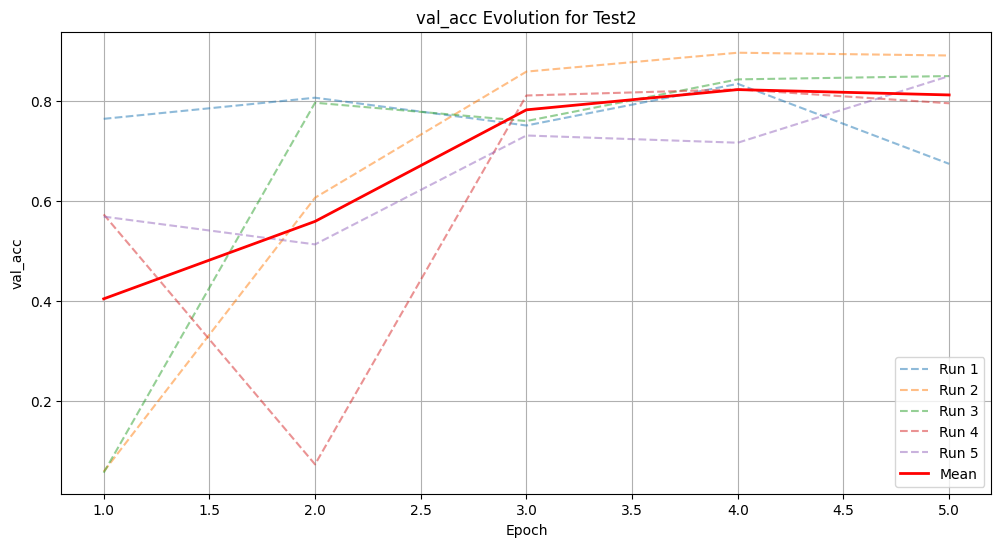

In [24]:
df = pd.read_csv('./results/complete_results.csv')


def plot_name_metrics(df, name, metric='val_acc', show_runs=True, show_mean=True):
    arch_data = df[df['architecture_name'] == name]
    
    if arch_data.empty:
        print(f"No data found for architecture: {name}")
        return
    
    if show_mean == False and show_runs == False:
        print(f"You must plot something bro")
        return

    grouped = arch_data.groupby(['run_number', 'epoch'])[metric].mean().reset_index()

    mean_per_epoch = grouped.groupby('epoch')[metric].mean()

    plt.figure(figsize=(12, 6))

    if show_runs:
        for run in grouped['run_number'].unique():
            run_data = grouped[grouped['run_number'] == run]
            plt.plot(run_data['epoch'], run_data[metric], label=f'Run {run}', alpha=0.5, linestyle='--')

    if show_mean:
        plt.plot(mean_per_epoch.index, mean_per_epoch.values, label='Mean', color='red', linewidth=2)

    plt.title(f'{metric} Evolution for {name}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.show()

plot_name_metrics(df, "Test2")

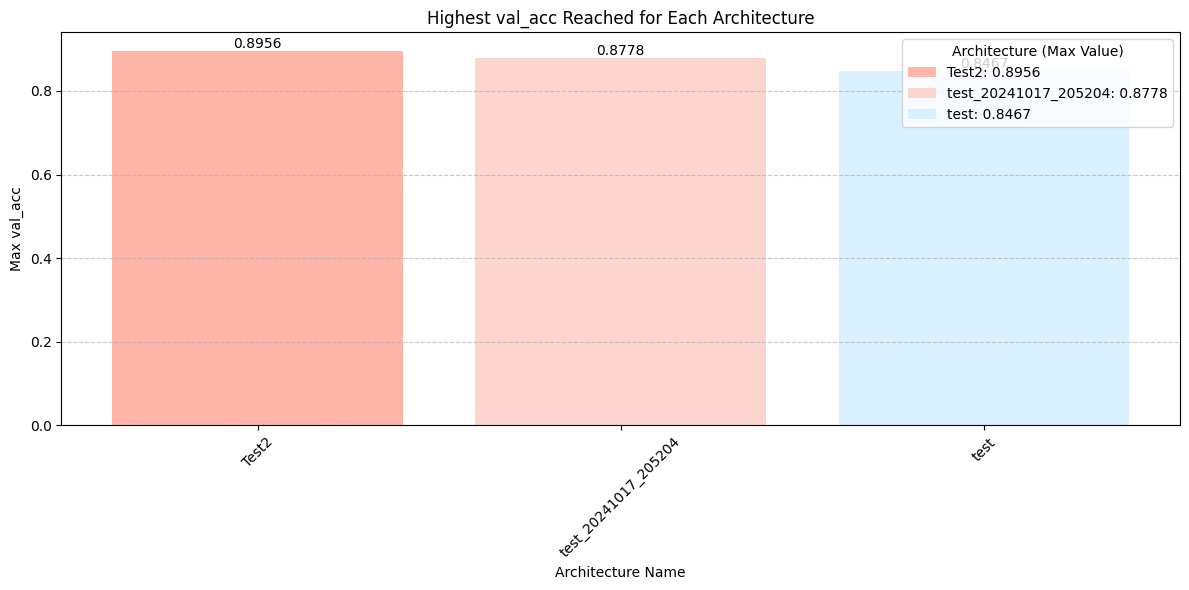

In [36]:
def plot_highest_bar(df, metric='val_acc'):
    max_metrics = df.groupby('architecture_name')[metric].max().reset_index()
    max_metrics = max_metrics.sort_values(by=metric, ascending=False)
    
    colors = [
    "#FFADAD",  # Soft Pink
    "#FFD6A5",  # Peach
    "#FDFFB6",  # Light Yellow
    "#CAFFBF",  # Pale Green
    "#9BF6FF",  # Sky Blue
    "#A0C4FF",  # Light Periwinkle
    "#BDB2FF",  # Lavender
    "#FFC6FF",  # Light Magenta
    "#FFB5A7",  # Pastel Coral
    "#FCD5CE",  # Warm Blush
    "#D9F0FF",  # Powder Blue
    "#BEE1E6",  # Light Teal
    "#A2D2FF",  # Soft Blue
    "#FFAFCC",  # Pinkish Rose
    "#C3F0CA",  # Mint
    "#FFE5D9",  # Soft Apricot
    "#FDE2E4",  # Light Pinkish
    "#E2F0CB",  # Pale Lime
    "#FFCAD4",  # Faded Pink
    "#B8F2E6",  # Aqua Mint
    "#FFC8A2",  # Light Tangerine
    "#B6E0FE",  # Light Baby Blue
    "#D9C5FF",  # Pastel Lavender
    "#F9F3DF",  # Off White Yellow
    "#E4C1F9"   # Pale Lilac
]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(max_metrics['architecture_name'], max_metrics[metric], color=colors)

    for bar, value in zip(bars, max_metrics[metric]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', 
                 ha='center', va='bottom')

    # Configure plot
    plt.title(f'Highest {metric} Reached for Each Architecture')
    plt.xlabel('Architecture Name')
    plt.ylabel(f'Max {metric}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    legend_labels = [f"{name}: {value:.4f}" for name, value in zip(max_metrics['architecture_name'], max_metrics[metric])]
    plt.legend(bars, legend_labels, title='Architecture (Max Value)') #  bbox_to_anchor=(1, 1), loc='upper left'

    plt.tight_layout() # Es veu millor
    plt.show()
plot_highest_bar(df)

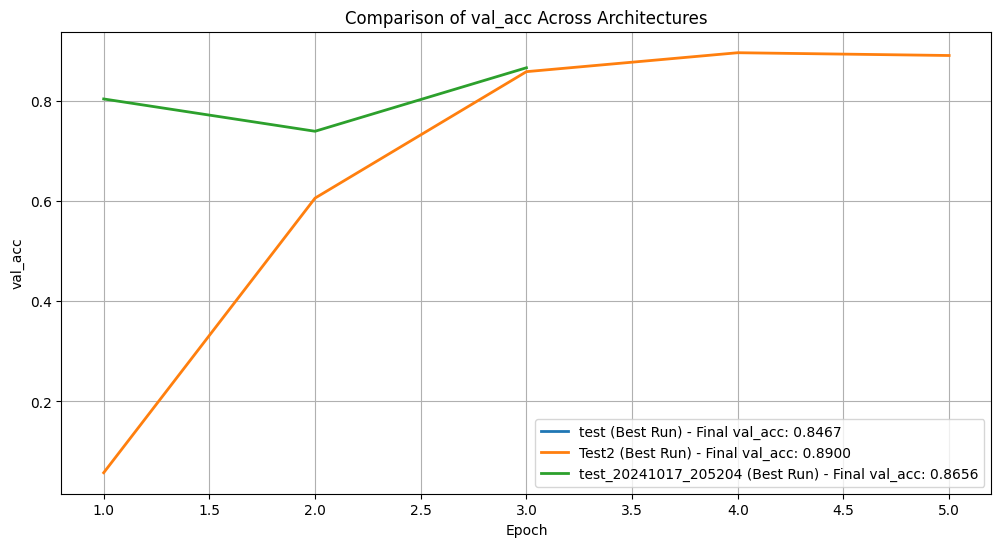

In [39]:
def plot_compare_architectures(df, architecture_names=None, metric='val_acc', best_run=True):
    plt.figure(figsize=(12, 6))
    if architecture_names is None:
        architecture_names = df['architecture_name'].unique()

    for arch in architecture_names:
        arch_data = df[df['architecture_name'] == arch]
        
        if arch_data.empty:
            print(f"No data found for architecture: {arch}")
            continue

        grouped = arch_data.groupby(['run_number', 'epoch'])[metric].mean().reset_index()

        if best_run:
            if 'loss' in metric.lower():
                best_run_number = grouped.groupby('run_number')[metric].last().idxmin()
            else:
                best_run_number = grouped.groupby('run_number')[metric].last().idxmax()

            run_data = grouped[grouped['run_number'] == best_run_number]
            label = f'{arch} (Best Run) - Final {metric}: {run_data[metric].values[-1]:.4f}'
        else:
            mean_per_epoch = grouped.groupby('epoch')[metric].mean()
            run_data = pd.DataFrame({'epoch': mean_per_epoch.index, metric: mean_per_epoch.values})
            label = f'{arch} (Mean) - Final {metric}: {mean_per_epoch.values[-1]:.4f}'

        plt.plot(run_data['epoch'], run_data[metric], label=label, linewidth=2)

    plt.title(f'Comparison of {metric} Across Architectures')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.show()

plot_compare_architectures(df)